In [9]:
import numpy as np
import pandas as pd
import time

Given the following (multi)sets of integers and targets

Set1: {2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24}

Set2: {3, 3, 5, 7, 9, 11, 12, 12, 12, 13, 15, 17, 19, 21, 23}

Set3: {3, 4, 6, 6, 9, 11, 11, 12, 15, 17, 17, 17, 18, 21, 21, 24}

Set4: {2, 3, 4, 7, 11, 11, 12, 13, 13, 14, 14, 16, 19, 21, 22, 24}

Target1: 140

Target2: 165

Target3: 182


**1. The algorithm in Listing 1 exhaustively tries all possible solutions using recursion. Fill up the “?” s of the
given algorithm.**

In [10]:
def is_subset_sum_recursive(arr, n, target, subset=[]):
    # Base Cases
    if target == 0:
        print("Subset with the given sum exists:", subset)
        return True
    if n == 0 and target != 0:
        #  print("Subset with the given sum does not sum exist")
        return False
    # If last element is greater than target, ignore it
    if arr[n - 1] > target:
        return is_subset_sum_recursive(arr, n - 1, target, subset)
    # Check if sum can be obtained by including the last element or excluding it
    return (is_subset_sum_recursive(arr, n - 1, target, subset) or
            is_subset_sum_recursive(arr, n - 1, target - arr[n - 1], subset + [arr[n - 1]]))



**2. Enumerate all the solutions you get by implementing the algorithm: for each set and each target. Your implementation should print “No Subset Found with given sum” if there doesn’t exist a given subset sum. Use any Python command to note down the time taken in execution of the algorithm for each case.**

In [11]:
targets = [140,165,182]
Set1 = np.array([2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24])
Set2 = np.array([3, 3, 5, 7, 9, 11, 12, 12, 12, 13, 15, 17, 19, 21, 23])
Set3 = np.array([3, 4, 6, 6, 9, 11, 11, 12, 15, 17, 17, 17, 18, 21, 21, 24])
Set4 = np.array([2, 3, 4, 7, 11, 11, 12, 13, 13, 14, 14, 16, 19, 21, 22, 24])
Sets = [Set1,Set2,Set3,Set4]

In [12]:
time_taken_recursive = []
for set_index, numbers in enumerate(Sets):
    print(f"Set {set_index + 1}: {numbers}")

    for target in targets:
        print(f"Target sum: {target}")
        start_time = time.time()
        is_subset_sum_recursive(numbers, len(numbers), target)
        end_time = time.time()
        time_taken_recursive.append(end_time - start_time)
        print(f"Time taken: {end_time - start_time} seconds")
        print('__________________________________________________________________________________________')
        print()

Set 1: [ 2  4  6  8  9  9  9 10 12 14 16 18 20 22 24]
Target sum: 140
Subset with the given sum exists: [22, 20, 18, 16, 14, 12, 9, 9, 8, 6, 4, 2]
Time taken: 0.02607274055480957 seconds
__________________________________________________________________________________________

Target sum: 165
Subset with the given sum exists: [24, 22, 20, 16, 14, 12, 10, 9, 9, 9, 8, 6, 4, 2]
Time taken: 0.03259897232055664 seconds
__________________________________________________________________________________________

Target sum: 182
Time taken: 0.03494548797607422 seconds
__________________________________________________________________________________________

Set 2: [ 3  3  5  7  9 11 12 12 12 13 15 17 19 21 23]
Target sum: 140
Subset with the given sum exists: [21, 17, 15, 13, 12, 12, 12, 11, 9, 7, 5, 3, 3]
Time taken: 0.013434171676635742 seconds
__________________________________________________________________________________________

Target sum: 165
Subset with the given sum exists: [23, 2

**3. The algorithm in Listing 2 uses dynamic programming to create a table to store the answers from previous
cases. Fill up the “?” s of the given algorithm.**


In [13]:
def subset_sum(numbers, target_sum):
    n = len(numbers)
    # Create a 2D table to store the results of subproblems
    dp = [[False] * (target_sum + 1) for _ in range(n + 1)]
    # Base case initialization (when sum is 0)
    for i in range(n + 1):
        dp[i][0] = True
    # Fill the dp table
    for i in range(1, n + 1):
        for j in range(1, target_sum + 1):
            # If the current number is greater than the target sum,
            # then the current number cannot be included in the subset
            if numbers[i - 1] > j:
                dp[i][j] = False
            else:
                # Check if it's possible to achieve the target sum
                # by either including or excluding the current number
                dp[i][j] = dp[i - 1][j] or dp[i - 1][j - numbers[i - 1]]
    # Trace back to find the elements included in the subset sum
    subset = []
    i, j = n, target_sum
    while i > 0 and j > 0:
        if dp[i][j] and not dp[i - 1][j]:
            subset.append(numbers[i - 1])
            j -= numbers[i - 1]
        i -= 1
    # Return the result and the subset
    return dp[n][target_sum], subset[::-1]

**4. Solve for each set and each target using the algorithm in Listing 2. Your implementation should print “No
Subset Found with given sum” if there doesn’t exist a given subset sum. Use any Python command to note
down the time taken in execution of the algorithm for each case**

In [14]:
time_taken_subsetsum = []
for set_index, numbers in enumerate(Sets):
    print(f"Set {set_index + 1}: {numbers}")
    for target in targets:
        print(f"Target sum: {target}")
        start_time = time.time()
        result, subset = subset_sum(numbers, target)
        if result:
            print("Subset with the given sum exists:", subset)
        else:
            print("No Subset Found with given sum")
        end_time = time.time()
        time_taken_subsetsum.append(end_time - start_time)
        print(f"Time taken: {end_time - start_time} seconds")
        print('_______________________________________________________________________________________')
        print()

Set 1: [ 2  4  6  8  9  9  9 10 12 14 16 18 20 22 24]
Target sum: 140
Subset with the given sum exists: [2, 4, 6, 8, 9, 9, 12, 14, 16, 18, 20, 22]
Time taken: 0.0027806758880615234 seconds
_______________________________________________________________________________________

Target sum: 165
Subset with the given sum exists: [2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 20, 22, 24]
Time taken: 0.0034949779510498047 seconds
_______________________________________________________________________________________

Target sum: 182
No Subset Found with given sum
Time taken: 0.0023512840270996094 seconds
_______________________________________________________________________________________

Set 2: [ 3  3  5  7  9 11 12 12 12 13 15 17 19 21 23]
Target sum: 140
Subset with the given sum exists: [3, 3, 5, 7, 9, 11, 12, 12, 12, 13, 15, 17, 21]
Time taken: 0.0010211467742919922 seconds
_______________________________________________________________________________________

Target sum: 165
Subset with th

**5. Plot a graph of input size vs worst-case time taken for both the algorithms.**

In [17]:
# time_taken_recursive time_taken_subsetsum
time_taken_recursive = [time_taken_recursive[i:i+3] for i in range(0, len(time_taken_recursive), 3)]

time_taken_subsetsum = [time_taken_subsetsum[i:i+3] for i in range(0, len(time_taken_subsetsum), 3)]

In [18]:
def max_time_func(lst):
  max_time=[]
  index_list=[]

  for time_list in lst:
    time=0
    ind=[]
    for j in range(len(time_list)):

      if time_list[j]>time:
        time=time_list[j]
        ind.append(j)
    index_list.append(max(ind))
    max_time.append(time)
  return max_time,index_list

In [19]:
max_time_1,index_list_1=max_time_func(time_taken_recursive)
max_time_2,index_list_2=max_time_func(time_taken_subsetsum)

In [20]:
def digit_sum(list_num):
  digit_list=[]
  for num in list_num:
    j=0

    for i in range(len(str(num))):
      j+=1
    digit_list.append(j)
  return digit_list

In [22]:
sum1 = sum(digit_sum(Set1))
sum2 = sum(digit_sum(Set2))
sum3 = sum(digit_sum(Set3))
sum4 = sum(digit_sum(Set4))

In [25]:
targets = [[140],[165],[182]]

In [28]:
target_digit=[]
for num in targets:
  target_digit.append(sum(digit_sum(num)))
len_set=[]
for ele in Sets:
  len_set.append(sum(digit_sum([len(ele)])))


In [30]:
input_size=[]
for i in range(len(Sets)):
  selected_set=Sets[i]
  sum_digit_set=sum(digit_sum(selected_set))
  sum_target=target_digit[index_list_1[i]]
  sum_set=len_set[i]
  input=sum_digit_set+sum_target+sum_set
  input_size.append(input)


In [31]:
import matplotlib.pyplot as plt

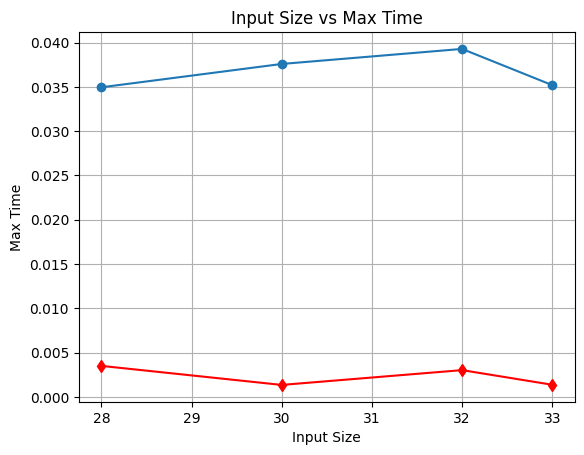

In [32]:
plt.plot(input_size, max_time_1, marker='o', linestyle='-')
plt.plot(input_size,max_time_2,marker='d',linestyle='-',color='red')
plt.title('Input Size vs Max Time')
plt.xlabel('Input Size')
plt.ylabel('Max Time')
plt.grid(True)
plt.show()


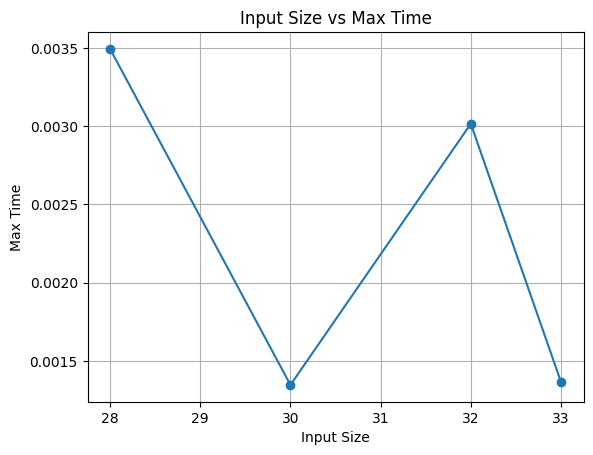

In [36]:
plt.plot(input_size, max_time_2, marker='o', linestyle='-')
plt.title('Input Size vs Max Time')
plt.xlabel('Input Size')
plt.ylabel('Max Time')
plt.grid(True)
plt.show()
